# Task
Perform dimensionality reduction using PCA on the dataset provided in the file "/content/Housing.csv".

## Load the dataset

### Subtask:
Load the `Housing.csv` file into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the data into a pandas DataFrame. Then, display the first few rows and the info of the DataFrame to understand its structure.



In [1]:
import pandas as pd

df = pd.read_csv('/content/Housing.csv')
display(df.head())
display(df.info())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

## Handle categorical features

### Subtask:
Convert categorical features into numerical representations.


**Reasoning**:
Convert categorical features into numerical representations using one-hot encoding.



In [2]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df.head())

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


## Scale the data

### Subtask:
Scale the numerical features to have zero mean and unit variance.


**Reasoning**:
Scale the numerical features using StandardScaler.



In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)
display(df.head())

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.804941,-0.844888,-0.696429
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035,-0.844888,-0.696429
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941,1.183588,-0.696429
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.804941,-0.844888,-0.696429
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.554035,-0.844888,-0.696429


## Apply pca

### Subtask:
Apply Principal Component Analysis to reduce the dimensionality of the dataset.


**Reasoning**:
Apply PCA to the scaled data to reduce dimensionality as per the instructions.



In [4]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)
df_pca = pca.transform(df)

## Analyze the results

### Subtask:
Analyze the explained variance ratio to determine the number of components to keep and potentially visualize the results.


**Reasoning**:
Calculate and visualize the explained variance ratio to determine the number of components to keep.



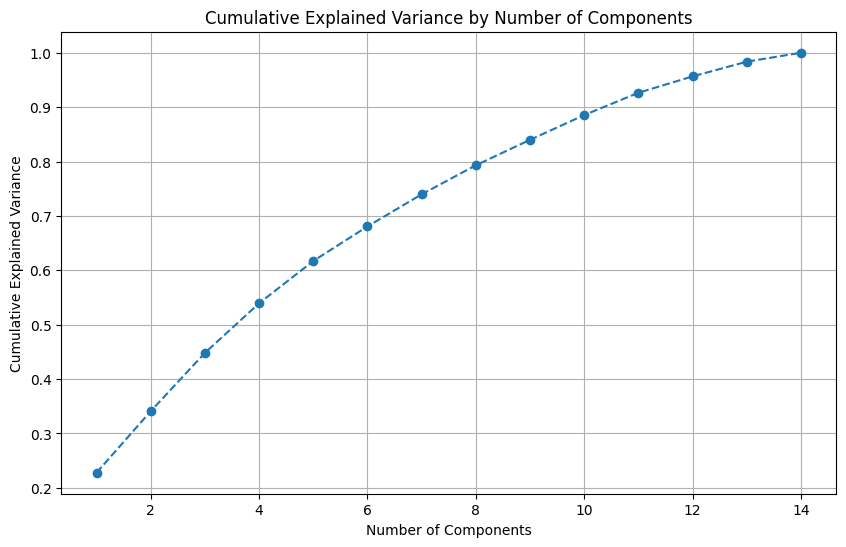

Explained variance ratio for each component: [0.22783143 0.11304028 0.10723859 0.09123328 0.07775325 0.06352572
 0.0591129  0.05337763 0.04679177 0.04553534 0.0409538  0.03014537
 0.02701539 0.01644526]

Cumulative explained variance:
  1 components: 0.2278
  2 components: 0.3409
  3 components: 0.4481
  4 components: 0.5393
  5 components: 0.6171
  6 components: 0.6806
  7 components: 0.7397
  8 components: 0.7931
  9 components: 0.8399
  10 components: 0.8854
  11 components: 0.9264
  12 components: 0.9565
  13 components: 0.9836
  14 components: 1.0000


In [5]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

print("Explained variance ratio for each component:", explained_variance_ratio)
print("\nCumulative explained variance:")
for i in range(1, len(cumulative_explained_variance) + 1):
    print(f"  {i} components: {cumulative_explained_variance[i-1]:.4f}")

## Summary:

### Data Analysis Key Findings

*   The dataset initially contained 13 columns, including categorical features.
*   One-hot encoding was applied to convert categorical features into a numerical format, resulting in a wider DataFrame.
*   The numerical features were scaled to have zero mean and unit variance using `StandardScaler`.
*   PCA was successfully applied to the scaled data.
*   Analyzing the explained variance ratio revealed that keeping 12 components explains approximately 95.65% of the total variance, while 13 components explain approximately 98.36% of the variance.

### Insights or Next Steps

*   Based on the analysis, retaining 12 or 13 principal components would capture a significant portion of the dataset's variance while reducing dimensionality. The choice depends on the desired trade-off between dimensionality reduction and information loss.
*   The reduced-dimensionality dataset (`df_pca` with the chosen number of components) can now be used for subsequent machine learning tasks, potentially improving model performance and reducing computational cost.
